# [Genre] Handcrafted Features

In [1]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
DATA_PATH = '../data/'
AUDIO_ROOT_PATH = DATA_PATH + 'genre-audios/'
SAMPLE_RATE = 22050

# <a name="example"> </a>  1. A Single Audio File Example

In [2]:
y, sr = librosa.load(AUDIO_ROOT_PATH + 'rock/rock.00000.wav')

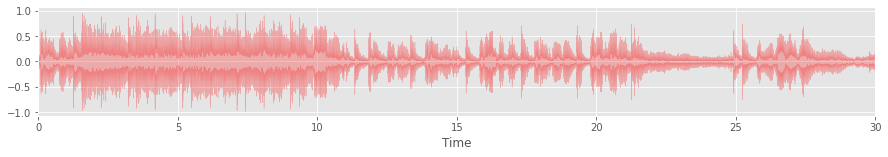

In [3]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y=y, sr=sr, alpha=0.25, color='red')

## 1.1. Time Domain Features

__1) Statistical moments__

In [4]:
print('Signal mean = {:.2f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.2f}'.format(np.std(y)))
print('Signal skewness = {:.2f}'.format(scipy.stats.skew(abs(y))))
print('Signal kurtosis = {:.2f}'.format(scipy.stats.kurtosis(y)))

Signal mean = 0.10
Signal std dev = 0.15
Signal skewness = 1.92
Signal kurtosis = 2.87


__2) Zero Crossing Rate__ 

ZCR mean = 0.09
ZCR std dev = 0.04


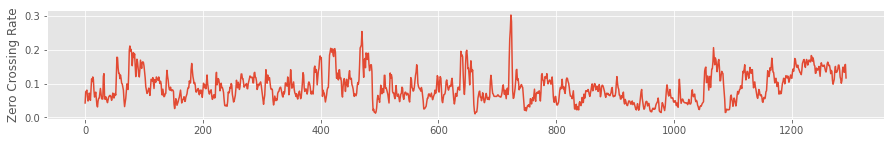

In [5]:
# Add a small constant before computing the zero crossing rate to disregard unwanted silence 'noise'
zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=1024, hop_length=512)[0]
plt.figure(figsize=(15,2))
plt.plot(zcr)
plt.ylabel('Zero Crossing Rate')
print('ZCR mean = {:.2f}'.format(np.mean(zcr)))
print('ZCR std dev = {:.2f}'.format(np.std(zcr)))

__3) Root Mean Squared Energy__

RMSE mean = 0.13
RMSE std dev = 0.07


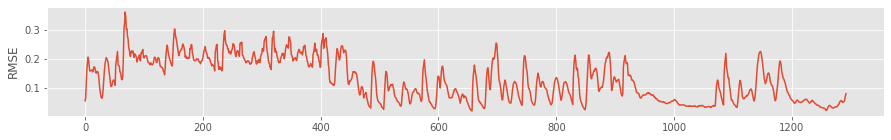

In [6]:
rmse = librosa.feature.rms(y + 0.0001)[0]
plt.figure(figsize=(15,2))
plt.plot(rmse)
plt.ylabel('RMSE')
print('RMSE mean = {:.2f}'.format(np.mean(rmse)))
print('RMSE std dev = {:.2f}'.format(np.std(rmse)))

## 1.2. Frequency Domain Features

__1) Spectral Centroid__

Spectral Centroid mean = 1963.07
Spectral Centroid std dev = 499.95


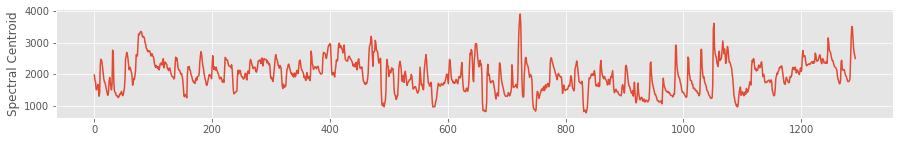

In [7]:
spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_centroids)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_centroids)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_centroids)))

2) __Spectral Band-width__

Spectral Bandwidth-2 mean = 2094.39
Spectral Bandwidth-2 std dev = 310.84
Spectral Bandwidth-3 mean = 2562.19
Spectral Bandwidth-3 std dev = 256.98
Spectral Bandwidth-4 mean = 3000.12
Spectral Bandwidth-4 std dev = 226.62


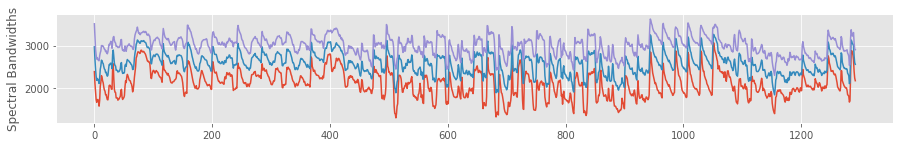

In [8]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_bandwidth_2)
plt.plot(spectral_bandwidth_3)
plt.plot(spectral_bandwidth_4)
plt.ylabel('Spectral Bandwidths')
print('Spectral Bandwidth-2 mean = {:.2f}'.format(np.mean(spectral_bandwidth_2)))
print('Spectral Bandwidth-2 std dev = {:.2f}'.format(np.std(spectral_bandwidth_2)))
print('Spectral Bandwidth-3 mean = {:.2f}'.format(np.mean(spectral_bandwidth_3)))
print('Spectral Bandwidth-3 std dev = {:.2f}'.format(np.std(spectral_bandwidth_3)))
print('Spectral Bandwidth-4 mean = {:.2f}'.format(np.mean(spectral_bandwidth_4)))
print('Spectral Bandwidth-4 std dev = {:.2f}'.format(np.std(spectral_bandwidth_4)))
# Highly Correlated features may cause issues in the model building

__3) Spectral Contrast__

Means [18.75581359 16.99214528 18.81036903 17.52979999 18.78993248 17.94290344
 40.57000389]
Std devs [4.59482309 4.33324402 4.91219891 3.94882019 4.07456756 2.70836418
 3.32372885]


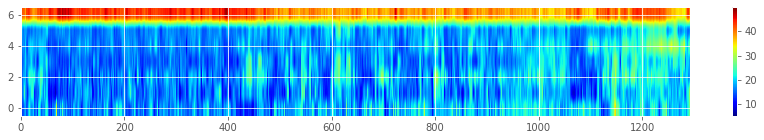

In [9]:
# Frequency cutoff for the first bin `[0, fmin]`
# Subsequent bins will cover `[fmin, 2*fmin]`, `[2*fmin, 4*fmin]
# Bins are on log scale
spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
plt.figure(figsize=(15,2))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(spectral_contrast, axis=1)) # Values are on dB scale
print('Std devs', np.std(spectral_contrast, axis=1))

__4) Spectral Roll-off__

Spectral Centroid mean = 4184.84
Spectral Centroid std dev = 1131.15


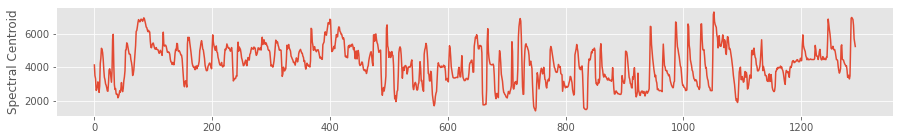

In [10]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_rolloff)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_rolloff)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_rolloff)))

__5) Mel-Frequency Cepstral Coefficients__

Means [-116.60436    109.2507     -23.165134    40.68874    -11.888448
   23.158089   -15.411178    15.128495   -13.53074     12.694694
  -10.87374      8.501457   -11.581522     2.199195    -6.184312
    1.9928461   -7.9548       2.0888877   -2.4004726   -1.5458374]
Std devs [76.423546  22.028818  19.212011  12.690337  14.007961  11.280925
 11.424188   7.9745216 10.572169   7.6959567  8.780011   7.3823643
  6.2465596  7.741309   8.502421   8.486396   5.972015   5.7444053
  5.522106   7.614721 ]


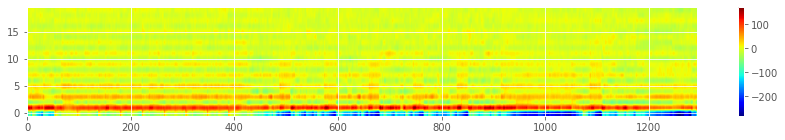

In [11]:
mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
plt.figure(figsize=(15,2))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(mfccs, axis=1)) 
print('Std devs', np.std(mfccs, axis=1))

In [14]:
mfccs.shape

(20, 1293)

__6) Chroma Features (STFT)__

A chroma vector (Wikipedia) (FMP, p. 123) is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

Means [0.3744356  0.49027827 0.49847704 0.41849175 0.47730723 0.33356884
 0.2829793  0.3272765  0.38827282 0.5085882  0.29371038 0.27265432]
Std devs [0.270891   0.2789199  0.3246263  0.24323736 0.33620888 0.2836944
 0.2383995  0.2956694  0.26084486 0.34857938 0.23391528 0.22617042]


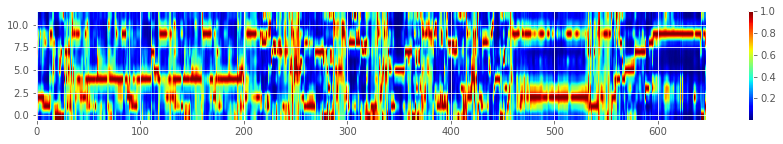

In [28]:
chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_stft, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_stft, axis=1)) 
print('Std devs', np.std(chroma_stft, axis=1))

__7) Chroma Features (CQT)__

Means [0.47895938 0.65237353 0.71421063 0.50009946 0.40904962 0.49150228
 0.48836016 0.43780674 0.47188783 0.49031852 0.38840914 0.37265086]
Std devs [0.29933987 0.23487178 0.27570478 0.18296506 0.22220973 0.30131096
 0.293854   0.27047851 0.2313177  0.26281389 0.19973064 0.22005999]


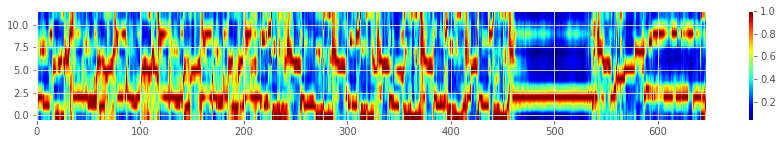

In [29]:
chroma_cqt = librosa.feature.chroma_cqt(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cqt, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cqt, axis=1)) 
print('Std devs', np.std(chroma_cqt, axis=1))

__8) Chroma Features (CENS) - Chroma energy normalized statistics__

The main idea of CENS features is that taking statistics over large windows smooths local deviations in tempo, articulation, and musical ornaments such as trills and arpeggiated chords. CENS are best used for tasks such as audio matching and similarity.

Means [0.23018217 0.37612648 0.39658961 0.28293397 0.19862765 0.2432847
 0.24028482 0.21350577 0.25492403 0.25678921 0.18624383 0.16266075]
Std devs [0.14989783 0.10126343 0.13683562 0.10663129 0.11451008 0.15642688
 0.14456791 0.12058667 0.09290974 0.11667033 0.07318377 0.10361023]


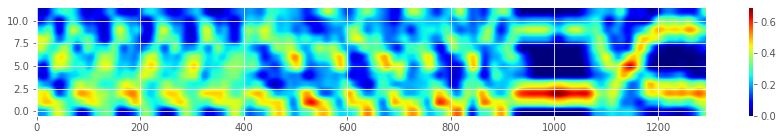

In [30]:
chroma_cens = librosa.feature.chroma_cens(y, sr=sr, hop_length=512)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cens, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cens, axis=1)) 
print('Std devs', np.std(chroma_cens, axis=1))

# <a name='extract'> </a> 2. Extracting Time and Frequency Domains Features

In [37]:
col_names = ['file_name', 'signal_mean', 'signal_std', 'signal_skew', 'signal_kurtosis', 
             'zcr_mean', 'zcr_std', 'rmse_mean', 'rmse_std', 'tempo',
             'spectral_centroid_mean', 'spectral_centroid_std',
             'spectral_bandwidth_2_mean', 'spectral_bandwidth_2_std',
             'spectral_bandwidth_3_mean', 'spectral_bandwidth_3_std',
             'spectral_bandwidth_4_mean', 'spectral_bandwidth_4_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(7)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(7)] + \
            ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)] + \
            ['chroma_stft_' + str(i+1) + '_mean' for i in range(12)] + \
            ['chroma_stft_' + str(i+1) + '_std' for i in range(12)] 
            
df = pd.DataFrame(columns=col_names)

In [38]:
# Looping through all the genres
for dirpath, _, filenames in os.walk(AUDIO_ROOT_PATH):

    # Ensuring that we're not at the root level
    if dirpath is not DATASET_PATH:

        for fn in filenames:

            # Loading the audio file
            file_path = os.path.join(dirpath, fn)
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

        
            feature_list = [fn]

            feature_list.append(np.mean(abs(y)))
            feature_list.append(np.std(y))
            feature_list.append(scipy.stats.skew(abs(y)))
            feature_list.append(scipy.stats.kurtosis(y))

            zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
            feature_list.append(np.mean(zcr))
            feature_list.append(np.std(zcr))

            rmse = librosa.feature.rms(y + 0.0001)[0]
            feature_list.append(np.mean(rmse))
            feature_list.append(np.std(rmse))
            
            tempo = librosa.beat.tempo(y, sr=sr)
            feature_list.extend(tempo)

            spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
            feature_list.append(np.mean(spectral_centroids))
            feature_list.append(np.std(spectral_centroids))

            spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
            spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
            spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
            feature_list.append(np.mean(spectral_bandwidth_2))
            feature_list.append(np.std(spectral_bandwidth_2))
            feature_list.append(np.mean(spectral_bandwidth_3))
            feature_list.append(np.std(spectral_bandwidth_3))
            feature_list.append(np.mean(spectral_bandwidth_3))
            feature_list.append(np.std(spectral_bandwidth_3))

            spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
            feature_list.extend(np.mean(spectral_contrast, axis=1))
            feature_list.extend(np.std(spectral_contrast, axis=1))

            spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
            feature_list.append(np.mean(spectral_rolloff))
            feature_list.append(np.std(spectral_rolloff))

            mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
            feature_list.extend(np.mean(mfccs, axis=1))
            feature_list.extend(np.std(mfccs, axis=1))

            chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
            feature_list.extend(np.mean(chroma_stft, axis=1))
            feature_list.extend(np.std(chroma_stft, axis=1))
            
            feature_list[1:] = np.round(feature_list[1:], decimals=3)
            
        
            df = df.append(pd.DataFrame(feature_list, index=col_names).transpose(), ignore_index=True)

# Save file
df.to_csv(DATA_PATH + 'df_features.csv', index=False)


Code from https://github.com/HareeshBahuleyan/music-genre-classification/blob/master/4_feature_extraction.ipynb